In [5]:
from minio import Minio
from minio.error import S3Error


In [11]:
def main():
    # Create a client with the MinIO server playground, its access key
    # and secret key.
    client = Minio(
        "127.0.0.1:9000",
        access_key="XOIgCewmHOP757dCWpzZ",
        secret_key="HB88g3Z10sMHdyyseH9W9jCTm9kjj0l437AjbC3C",
        secure=False
    )
    
    client.fget_object("weather-dataset", "big_data_wheter_dataset/city_attributes.csv" ,file_path="city_attributes.csv")
        
    

In [12]:
main()

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
raw_data = pd.read_csv("city_attributes.csv")

In [15]:
raw_data.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


<AxesSubplot: title={'center': 'Number of contry representation in a the dataset'}, xlabel='Country', ylabel='Count'>

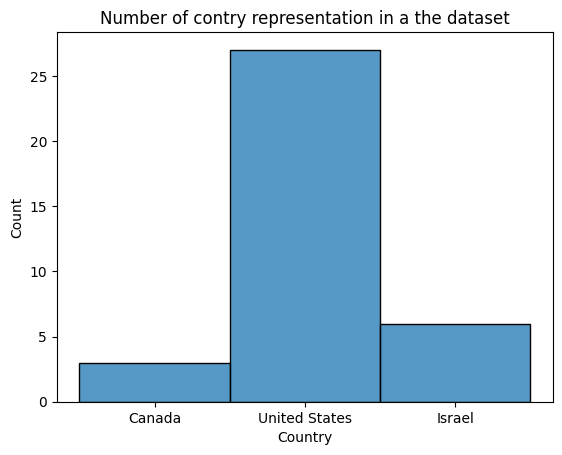

In [16]:
plt.title("Number of contry representation in a the dataset")
sns.histplot(raw_data, x='Country')

In [17]:
raw_data.City.count()

36

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

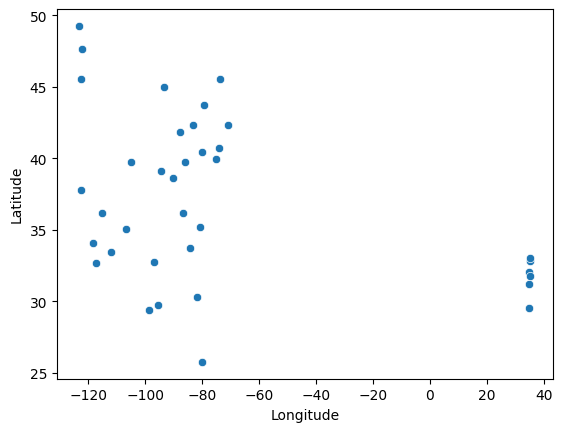

In [12]:
sns.scatterplot(data=raw_data, x='Longitude', y='Latitude')

In [14]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [15]:
geometry = [Point(xy) for xy in zip(raw_data['Longitude'], raw_data['Latitude'])]

In [17]:
crs = {'init':'epsg:4326'}

geo_df = gpd.GeoDataFrame(raw_data, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/home/thimotee/miniconda3/envs/evy/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,City,Country,Latitude,Longitude,geometry
0,Vancouver,Canada,49.249660,-123.119339,POINT (-123.11934 49.24966)
1,Portland,United States,45.523449,-122.676208,POINT (-122.67621 45.52345)
2,San Francisco,United States,37.774929,-122.419418,POINT (-122.41942 37.77493)
3,Seattle,United States,47.606209,-122.332069,POINT (-122.33207 47.60621)
4,Los Angeles,United States,34.052231,-118.243683,POINT (-118.24368 34.05223)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


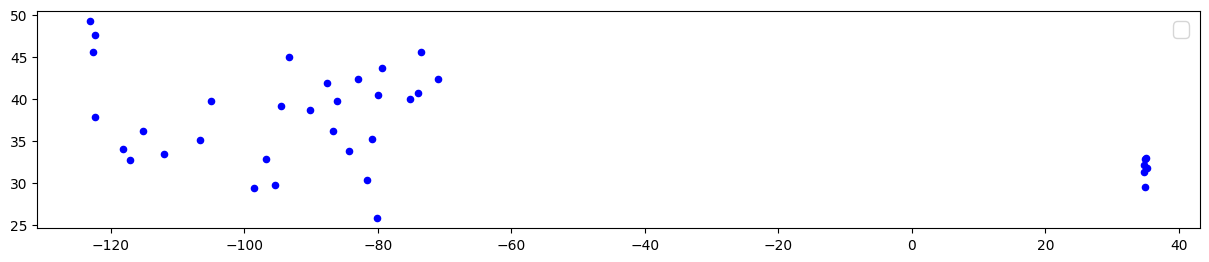

: 

In [20]:
# street_map = gpd.read_file('/path/to/your/geo_export_12345.shp')

fig, ax = plt.subplots(figsize=(15,15))
# street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
                                       markersize=20, 
                                       color='blue', 
                                       marker='o')
plt.legend(prop={'size':15})